In [13]:
%matplotlib inline

from eqcart import Cartogram
from chorogrid import Chorogrid
import geopandas as gpd
import json
import numpy as np
import seaborn as sns
import streamlit as st
import pandas as pd
import pydeck as pdk
import random
from cartutils import is_valid, delete_old_point, update_new_point, shunt_point


In [9]:
import tesspy
import numpy as np


In [2]:
geodf = gpd.read_file("geo_data.csv")
geodf = geodf[geodf.id != '0']


In [3]:
geodf['centroid'] = list(zip(geodf['latitude'], geodf['longitude']))


In [4]:
num_x_grid = 40#25
num_y_grid = 50#20
if num_x_grid * num_y_grid < geodf.shape[0]:
    print("Add more dimensions to the grid. I.e., increase the num_x_grid, num_y_grid, or both")


In [5]:
geodf['latitude'] = geodf['latitude'].astype(float)
geodf['longitude'] = geodf['longitude'].astype(float)


In [6]:
xmax, xmin = geodf['latitude'].max(), geodf['latitude'].min()
ymax, ymin = geodf['longitude'].max(), geodf['longitude'].min()
x_range = xmax - xmin
y_range = ymax - ymin

geodf["x_bin"] = geodf["latitude"].apply(lambda x: int(num_x_grid*(x - xmin)/x_range))
geodf["y_bin"] = geodf["longitude"].apply(lambda y: int(num_y_grid*(ymax-y)/y_range))


In [7]:
point_position = geodf.set_index("id")[['x_bin', 'y_bin']].to_dict(orient='index')

x_coords_points = {}
y_coords_points = {}

for point in point_position:
    if point_position[point]['x_bin'] not in x_coords_points:
        x_coords_points[point_position[point]['x_bin']] = []
    if point_position[point]['y_bin'] not in y_coords_points:
        y_coords_points[point_position[point]['y_bin']] = []
    x_coords_points[point_position[point]['x_bin']].append(point)
    y_coords_points[point_position[point]['y_bin']].append(point)


In [8]:
coord_points = {} #{str(value['x_bin']) + "_" + str(value["y_bin"]): key for key, value in point_position.iteritems()}


In [10]:
for point, value in point_position.items():
    if (str(value["x_bin"]) + "_" + str(value["y_bin"])) not in coord_points:
        coord_points[str(value["x_bin"]) + "_" + str(value["y_bin"])] = []
    coord_points[str(value["x_bin"]) + "_" + str(value["y_bin"])].append(point)
iteration = 0


In [24]:
while not is_valid(coord_points):
    coord_to_shunt_from = max(coord_points, key=lambda x: len(coord_points[x]))
    ac_to_shunt = coord_points[coord_to_shunt_from][1]
    shunt_point(coord_to_shunt_from)
    iteration += 1


NameError: name 'coord_points' is not defined

<Axes: xlabel='x_bin', ylabel='y_bin'>

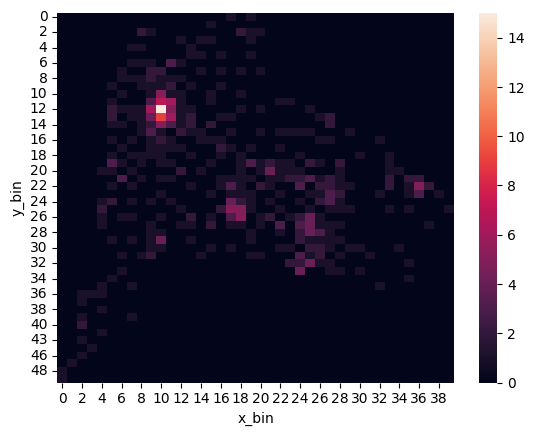

In [148]:
sns.heatmap(pd.crosstab(geodf["y_bin"], geodf["x_bin"]))


In [149]:
geodf['hex_x'] = geodf['id'].apply(lambda x: point_position[x.split("_")[-1]]["x_bin"])
geodf['hex_y'] = geodf['id'].apply(lambda x: point_position[x.split("_")[-1]]["y_bin"])
ids = geodf.id.tolist()
colors = ["#eeeeee"]*len(ids)


In [150]:
geodf


,longitude,latitude,fake_results,color,id,geometry,centroid,x_bin,y_bin,hex_x,hex_y
1,-1.928195,52.614276,0,"[255, 0, 0, 1]",1,None,"(52.61427612368785, -1.9281954903421805)",18,25,20,25
2,-2.365788,53.393541,0,"[255, 0, 0, 1]",2,None,"(53.39354061906345, -2.3657884892189305)",24,28,24,28
3,-1.399921,53.039952,0,"[255, 0, 0, 1]",3,None,"(53.039951775440315, -1.399920873555882)",22,21,22,21
4,-0.454579,50.927867,2,"[128, 128, 128, 1]",4,None,"(50.9278672769609, -0.4545789147339758)",6,14,6,14
5,-1.271945,53.093079,3,"[0, 255, 0, 1]",5,None,"(53.09307886525737, -1.271944658912507)",22,20,24,20
...,...,...,...,...,...,...,...,...,...,...,...
528,-2.274656,52.379592,3,"[0, 255, 0, 1]",528,None,"(52.37959158114841, -2.2746557104450624)",17,27,17,27
529,-2.281529,53.392526,3,"[0, 255, 0, 1]",529,None,"(53.3925257915588, -2.281528599761064)",24,27,25,27
530,-2.817415,50.919256,1,"[0, 0, 255, 1]",530,None,"(50.91925641316621, -2.817414947712852)",6,31,6,31
531,-1.092298,53.956749,1,"[0, 0, 255, 1]",531,None,"(53.95674881479849, -1.0922975048286059)",28,19,28,19


In [151]:
geodf.to_csv('geodf.csv', index=False)


In [152]:
# Use the CSV file path in Chorogrid constructor
cg = Chorogrid('geodf.csv', ids, colors, id_column="id")


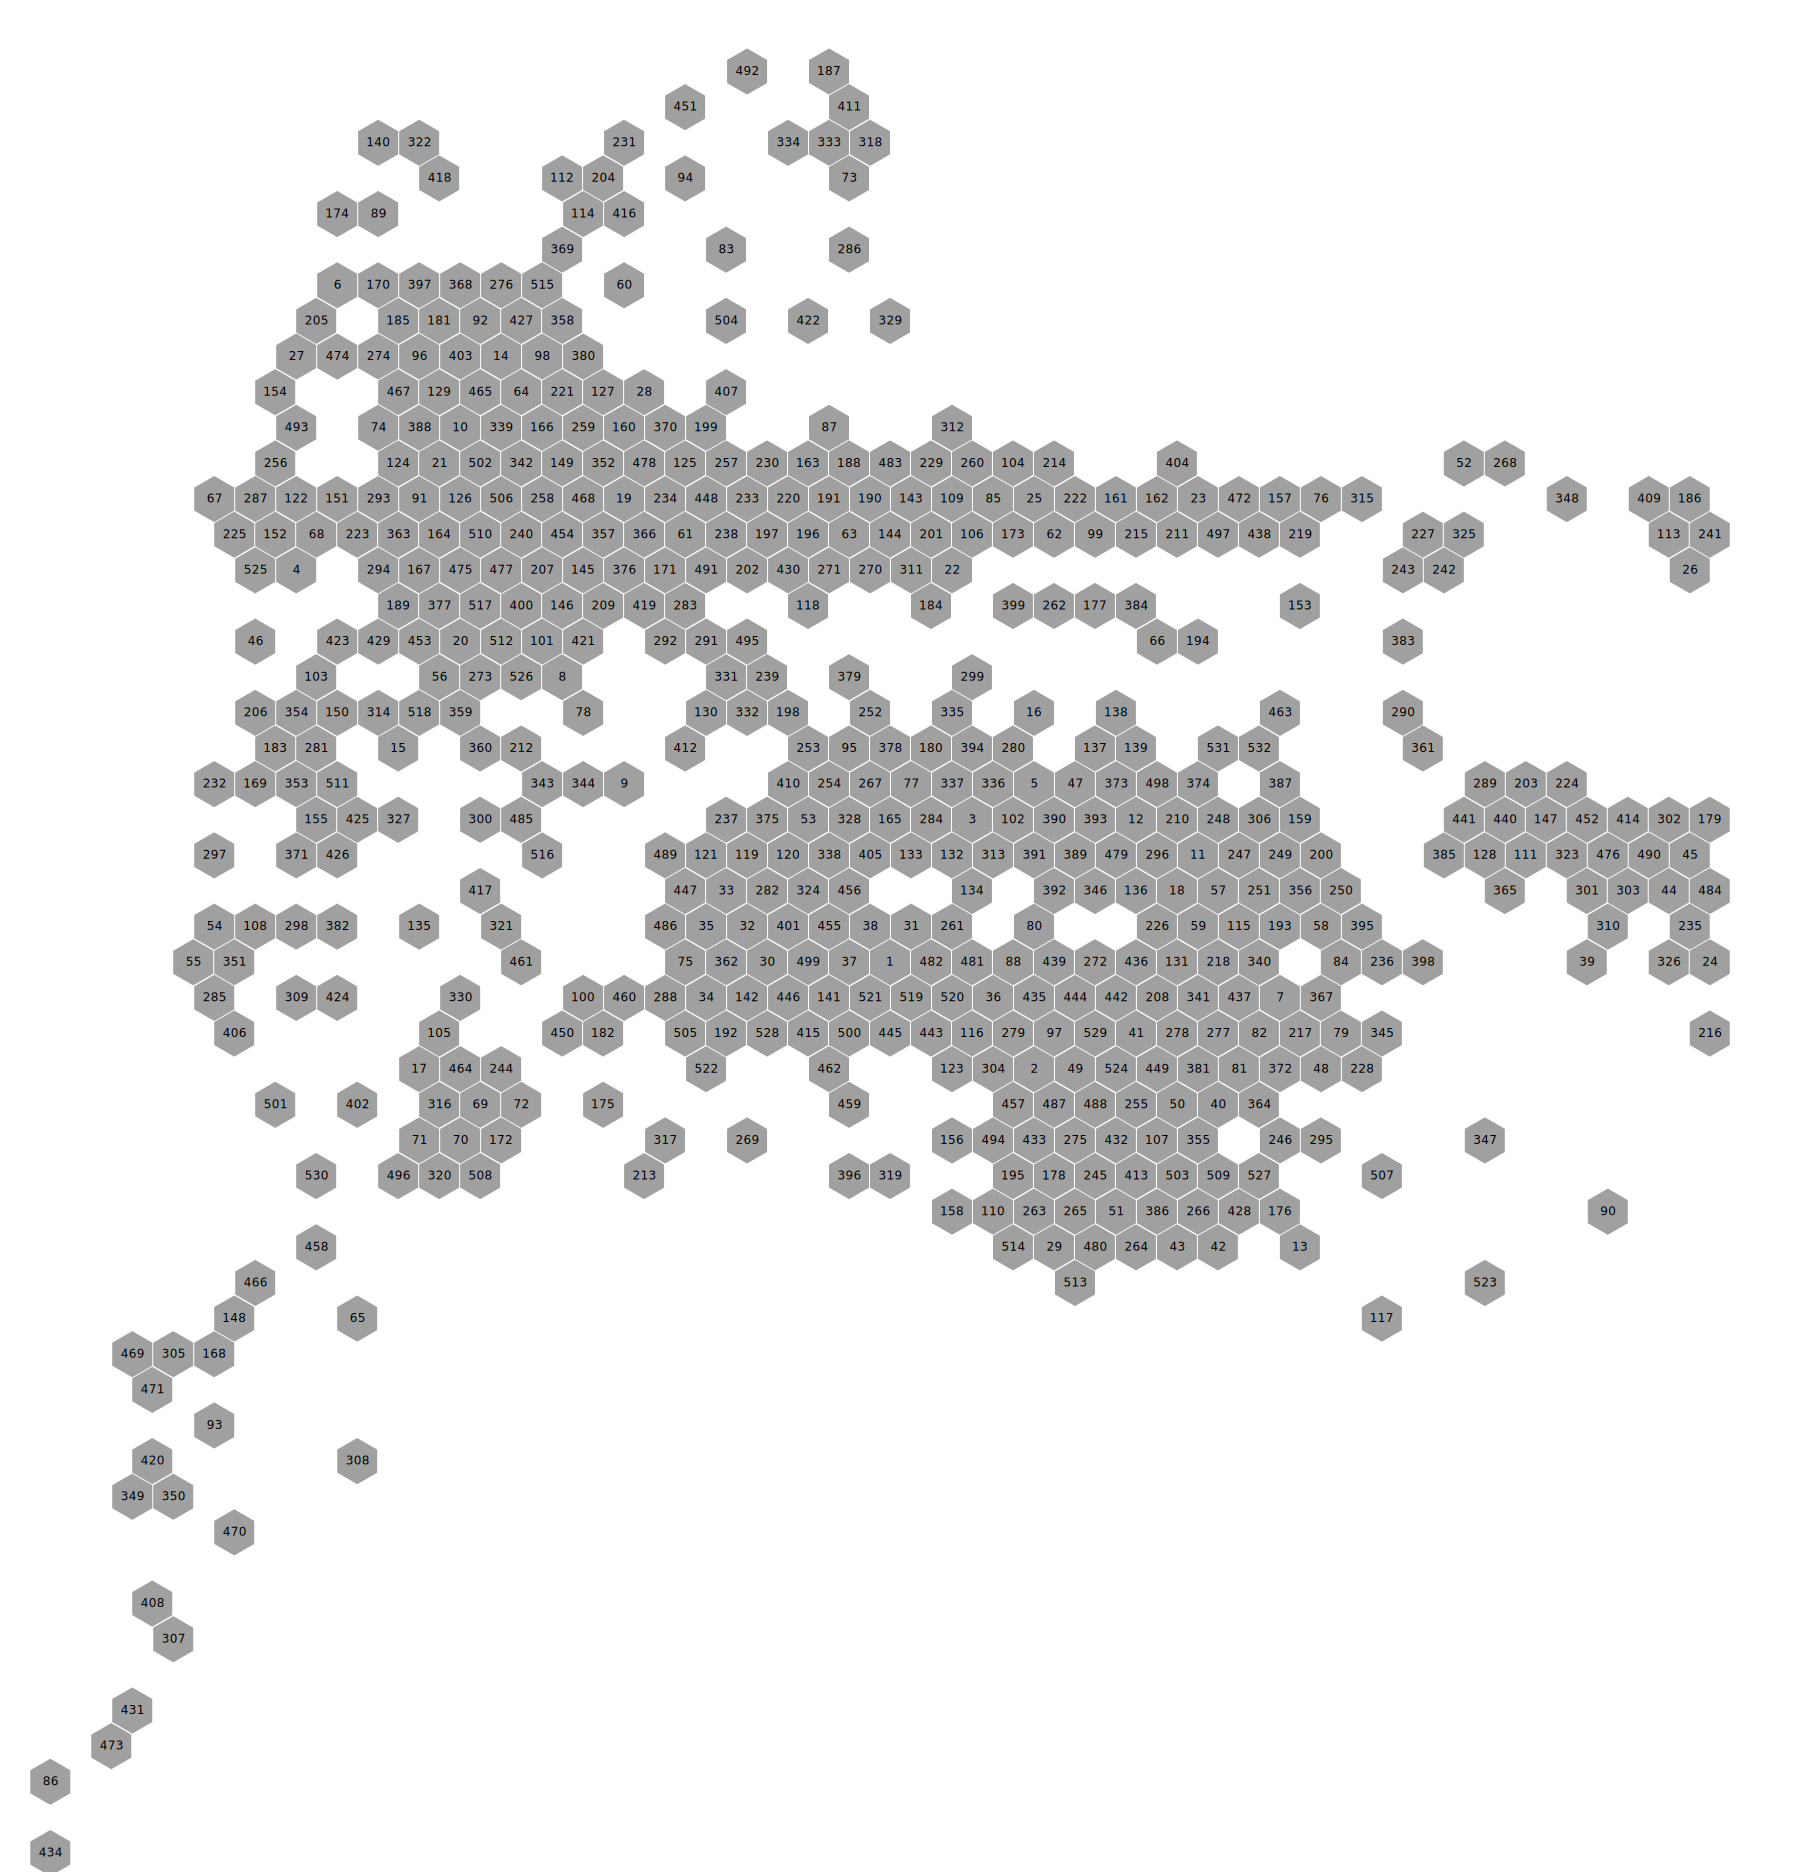

In [153]:
cg.draw_hex()
cg.done(save_filename="geo_uk_hex.svg", show=True)


In [5]:
england = tesspy.Tessellation("England")


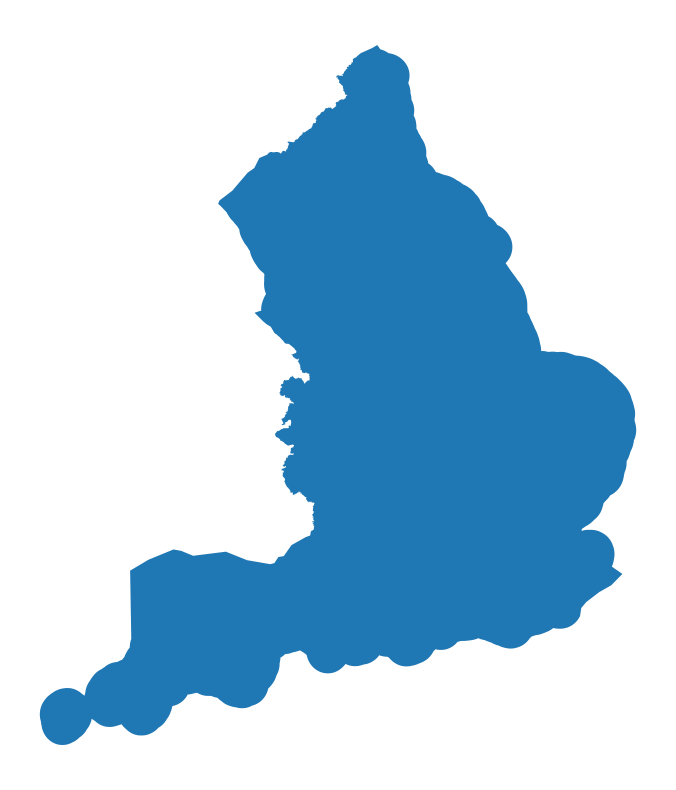

In [6]:
england.get_polygon().plot(figsize=(10, 10)).set_axis_off();


In [7]:
print(england.get_polygon().crs)


epsg:4326


In [10]:
england_hex_5 = england.hexagons(5)
england_hex_5['votes'] = england_hex_5.apply(lambda x: np.random.randint(0, 4  ), axis=1)
england_hex_5


,hex_id,geometry,votes
0,85187627fffffff,"POLYGON ((-5.91747 50.05021, -6.01681 49.99472...",1
1,8519596bfffffff,"POLYGON ((-2.12733 50.64138, -2.22823 50.59038...",1
2,85195b63fffffff,"POLYGON ((-3.48927 50.54087, -3.58987 50.48834...",3
3,85195527fffffff,"POLYGON ((-2.17129 54.02298, -2.27843 53.97493...",2
4,85194e3bfffffff,"POLYGON ((0.69052 51.70532, 0.58777 51.65827, ...",0
...,...,...,...
786,85194307fffffff,"POLYGON ((-0.24565 52.69899, -0.35028 52.65180...",1
787,85195127fffffff,"POLYGON ((-2.73233 53.09099, -2.83760 53.04149...",0
788,85194ac3fffffff,"POLYGON ((-0.15051 51.41033, -0.25278 51.36211...",1
789,85195ca7fffffff,"POLYGON ((-1.25456 52.52422, -1.35887 52.47579...",0


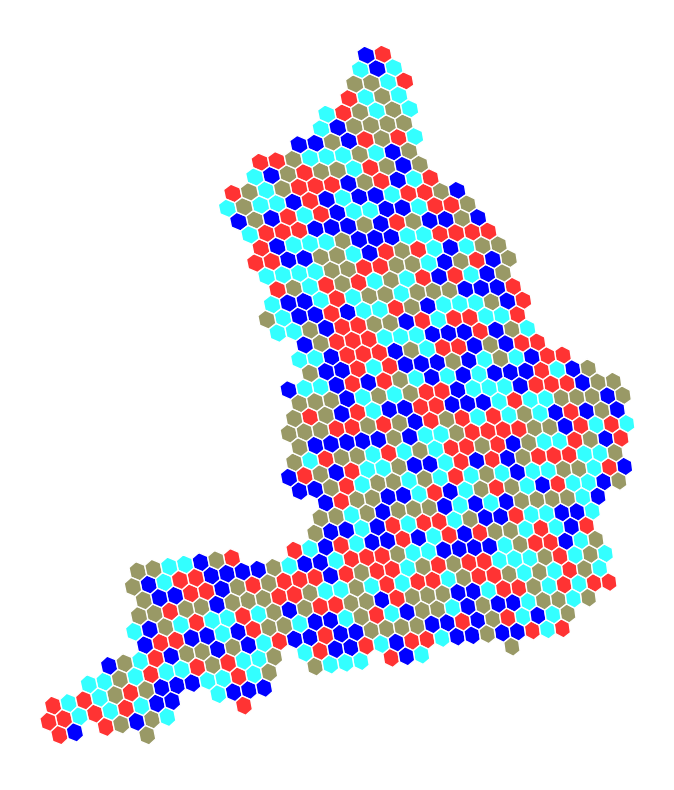

In [15]:
from matplotlib.colors import ListedColormap

england_hex_5 = england.hexagons(5)
cmap = ListedColormap(['#ff3333', 'b', '#33ffff', '#999966'])
england_hex_5.plot(lw=1, edgecolor="w", cmap=cmap, figsize=(10, 10)).set_axis_off();


## Making a normal sized map with set boundaries

In [42]:
from urllib.request import urlopen
import json
import geopandas as gpd
import pandas as pd

with open("data/England.geojson", "r") as file:
    data = json.load(file)

gdf = gpd.GeoDataFrame.from_features(data["features"])
coordinates = gdf.get_coordinates()
coordinates.columns = ["lng", "lat"]
centroids = gdf.centroid.to_frame()


In [31]:
import plotly.express as px


In [43]:
gdf["votes"] = gdf.apply(lambda x: np.random.randint(0, 4), axis=1)
gdf["lng"] = gdf.centroid.x
gdf['lat'] = gdf.centroid.y
gdf


,geometry,id,PCON13CD,PCON13CDO,PCON13NM,votes,lng,lat
0,"POLYGON ((-0.80469 51.24503, -0.80632 51.25335...",E14000530,E14000530,A01,Aldershot,0,-0.777004,51.285429
1,"POLYGON ((-1.99112 52.63661, -1.98866 52.63899...",E14000531,E14000531,A02,Aldridge-Brownhills,0,-1.928195,52.614276
2,"POLYGON ((-2.31432 53.35737, -2.31432 53.35856...",E14000532,E14000532,A03,Altrincham and Sale West,2,-2.365788,53.393541
3,"POLYGON ((-1.30790 53.00413, -1.30708 53.00353...",E14000533,E14000533,A04,Amber Valley,1,-1.399921,53.039952
4,"MULTIPOLYGON (((-0.53958 50.86621, -0.53713 50...",E14000534,E14000534,A05,Arundel and South Downs,3,-0.454579,50.927867
...,...,...,...,...,...,...,...,...
528,"POLYGON ((-2.28732 52.45523, -2.28650 52.45463...",E14001058,E14001058,F34,Wyre Forest,3,-2.274656,52.379592
529,"POLYGON ((-2.31432 53.35737, -2.30614 53.35856...",E14001059,E14001059,F35,Wythenshawe and Sale East,0,-2.281529,53.392526
530,"POLYGON ((-2.95417 50.82101, -2.95581 50.82339...",E14001060,E14001060,F36,Yeovil,3,-2.817415,50.919256
531,"POLYGON ((-1.05016 53.96812, -1.05097 53.96812...",E14001061,E14001061,F37,York Central,0,-1.092298,53.956749


In [49]:

fig = px.choropleth(gdf,
                    geojson=gdf,
                    locations='id',
                    color='votes',
                    color_discrete_map={0: 'color1', 1: 'color2', 2: 'color3', 3: 'color4'},  # Specify 4 colors
                    category_orders={'votes': [0, 1, 2, 3]},  # Specify the order of the colors
                    labels={'votes': 'Votes'},  # Label for color legend
                    title='Choropleth Map of Votes',
                    )

fig.update_geos(featureidkey="properties.id", visible=False)  # Specify featureidkey and set visibility to False

fig.update_layout(geo=dict(center={"lat": 53.5, "lon": -1}, projection_scale=5),  # Adjust center and scale
                  margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.Geo: 'featureidkey'

Did you mean "framewidth"?

    Valid properties:
        bgcolor
            Set the background color of the map
        center
            :class:`plotly.graph_objects.layout.geo.Center`
            instance or dict with compatible properties
        coastlinecolor
            Sets the coastline color.
        coastlinewidth
            Sets the coastline stroke width (in px).
        countrycolor
            Sets line color of the country boundaries.
        countrywidth
            Sets line width (in px) of the country boundaries.
        domain
            :class:`plotly.graph_objects.layout.geo.Domain`
            instance or dict with compatible properties
        fitbounds
            Determines if this subplot's view settings are auto-
            computed to fit trace data. On scoped maps, setting
            `fitbounds` leads to `center.lon` and `center.lat`
            getting auto-filled. On maps with a non-clipped
            projection, setting `fitbounds` leads to `center.lon`,
            `center.lat`, and `projection.rotation.lon` getting
            auto-filled. On maps with a clipped projection, setting
            `fitbounds` leads to `center.lon`, `center.lat`,
            `projection.rotation.lon`, `projection.rotation.lat`,
            `lonaxis.range` and `lonaxis.range` getting auto-
            filled. If "locations", only the trace's visible
            locations are considered in the `fitbounds`
            computations. If "geojson", the entire trace input
            `geojson` (if provided) is considered in the
            `fitbounds` computations, Defaults to False.
        framecolor
            Sets the color the frame.
        framewidth
            Sets the stroke width (in px) of the frame.
        lakecolor
            Sets the color of the lakes.
        landcolor
            Sets the land mass color.
        lataxis
            :class:`plotly.graph_objects.layout.geo.Lataxis`
            instance or dict with compatible properties
        lonaxis
            :class:`plotly.graph_objects.layout.geo.Lonaxis`
            instance or dict with compatible properties
        oceancolor
            Sets the ocean color
        projection
            :class:`plotly.graph_objects.layout.geo.Projection`
            instance or dict with compatible properties
        resolution
            Sets the resolution of the base layers. The values have
            units of km/mm e.g. 110 corresponds to a scale ratio of
            1:110,000,000.
        rivercolor
            Sets color of the rivers.
        riverwidth
            Sets the stroke width (in px) of the rivers.
        scope
            Set the scope of the map.
        showcoastlines
            Sets whether or not the coastlines are drawn.
        showcountries
            Sets whether or not country boundaries are drawn.
        showframe
            Sets whether or not a frame is drawn around the map.
        showlakes
            Sets whether or not lakes are drawn.
        showland
            Sets whether or not land masses are filled in color.
        showocean
            Sets whether or not oceans are filled in color.
        showrivers
            Sets whether or not rivers are drawn.
        showsubunits
            Sets whether or not boundaries of subunits within
            countries (e.g. states, provinces) are drawn.
        subunitcolor
            Sets the color of the subunits boundaries.
        subunitwidth
            Sets the stroke width (in px) of the subunits
            boundaries.
        uirevision
            Controls persistence of user-driven changes in the view
            (projection and center). Defaults to
            `layout.uirevision`.
        visible
            Sets the default visibility of the base layers.
        
Did you mean "framewidth"?

Bad property path:
featureidkey
^^^^^^^^^^^^